In [3]:
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
"""
 0: airplane
 1: automobile
 2: bird
 3: cat
 4: deer
 5: dog
 6: frog
 7: horse
 8: ship
 9: truck
 """

'\n 0: airplane\n 1: automobile\n 2: bird\n 3: cat\n 4: deer\n 5: dog\n 6: frog\n 7: horse\n 8: ship\n 9: truck\n '

In [4]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

<function matplotlib.pyplot.show>

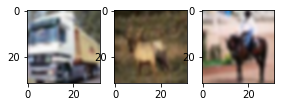

In [5]:
plt.subplot(141)
plt.imshow(x_train[1], interpolation = 'bicubic')
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[3], interpolation = 'bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[11], interpolation = 'bicubic')
plt.grid(False)
plt.show

In [6]:
print("Training data:")

print("train set : {0}".format(x_train.shape[0]))
print("test set  : {0}".format(x_test.shape[0]))

print("Number of channels :", x_train.shape[3])
print("Image size: ", x_train.shape[1], x_train.shape[2])

print("target value : ", y_train[0]) #targets consist of numbers. (not name)

  

Training data:
train set : 50000
test set  : 10000
Number of channels : 3
Image size:  32 32
target value :  [6]


In [7]:
print("mean before normalization:",np.mean(x_train))
print("std before normalization:",np.std(x_train))

mean = [0,0,0]
std = [0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)

#train set에 있는 데이터로 mean과 std를 구함
for i in range(3): #channel = 3
  mean[i] = np.mean(x_train[ : , : , : , i])
  std[i] = np.std(x_train[ : , : , : ,i])

#정규화하기 N(0,1)
for i in range(3):
  newX_train[ : , : , : , i] = x_train[ : , : , : ,i] - mean[i]
  newX_train[ : , : , : , i] = newX_train[ : , : , : ,i] / std[i]
  newX_test[ : , : , : , i] = x_test[ : , : , : ,i] - mean[i]
  newX_test[ : , : , : , i] = newX_test[ : , : , : ,i] / std[i]

#newX_train -> x_train -> X_train 
X_train = newX_train
X_test = newX_test

print("mean after normalization:",np.mean(X_train))
print("std after normalization:",np.std(X_train))




mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996


In [15]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#X_train = X_train.reshape(X_train.shape[0], 32, 32)
#X_test = X_test.reshape(X_test.shape[0], 32, 32)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("Original:",y_train[0],"/ Revised:",Y_train[0])

Original: [6] / Revised: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
model = Sequential()

#1
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), activation ='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size = 2))

#2
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))

#3
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))

#4
model.add(Flatten())
model.add(Dense(256, activation ='relu'))

#5
model.add(Dense(256, activation = 'relu'))

#6
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = 'C:\\Users\\PAN\\Desktop\\GItClone\\model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="C:\\Users\\PAN\\Desktop\\GItClone\\model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=256, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 1.81247, saving model to C:\Users\PAN\Desktop\GItClone\model/01-1.8125.hdf5

Epoch 00002: val_loss improved from 1.81247 to 1.66294, saving model to C:\Users\PAN\Desktop\GItClone\model/02-1.6629.hdf5

Epoch 00003: val_loss improved from 1.66294 to 1.57305, saving model to C:\Users\PAN\Desktop\GItClone\model/03-1.5730.hdf5

Epoch 00004: val_loss improved from 1.57305 to 1.45084, saving model to C:\Users\PAN\Desktop\GItClone\model/04-1.4508.hdf5

Epoch 00005: val_loss improved from 1.45084 to 1.39060, saving model to C:\Users\PAN\Desktop\GItClone\model/05-1.3906.hdf5

Epoch 00006: val_loss improved from 1.39060 to 1.38474, saving model to C:\Users\PAN\Desktop\GItClone\model/06-1.3847.hdf5

Epoch 00007: val_loss improved from 1.38474 to 1.25398, saving model to C:\Users\PAN\Desktop\GItClone\model/07-1.2540.hdf5

Epoch 00008: val_loss improved from 1.25398 to 1.22300, saving model to C:\Users\PAN\Desktop\GItClone\model/08-1.2230.hdf5

Epoch 00009

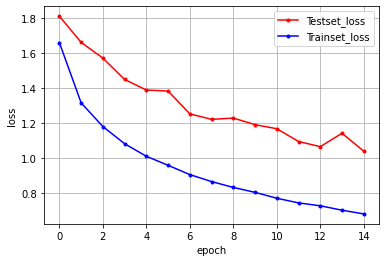

In [18]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
